# pyspark sql

### 1. Initialization and Setup

In [1]:
! pip install pyspark 
import os
import warnings
warnings.filterwarnings('ignore')
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, StringType, IntegerType, FloatType
from pyspark.sql.functions import split, count, when, isnan, col, regexp_replace

# Start Spark session
spark = SparkSession.builder.appName('pyspark sql').getOrCreate()
print('Spark Version: {}'.format(spark.version))


24/06/17 15:49:11 WARN Utils: Your hostname, MACHINE resolves to a loopback address: 127.0.1.1; using 10.10.205.14 instead (on interface wlp2s0)
24/06/17 15:49:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/17 15:49:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Spark Version: 3.5.1


### 2. Spark Context Initialization

In [2]:
import pyspark as sp

sc = sp.SparkContext.getOrCreate()
print(sc)
print(sc.version)


<SparkContext master=local[*] appName=pyspark sql>
3.5.1


###  3. Reading the Dataset

In [3]:
# Load dataset
auto_mpg = spark.read.csv('Datasets/car.csv', header=True, inferSchema=True)
auto_mpg.show(5)


+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



### 4. spark.sql

In [4]:
# Create a temporary view of the DataFrame
auto_mpg.createOrReplaceTempView("auto_mpg")

In [5]:
#  Select all data
result = spark.sql("SELECT * FROM auto_mpg")
result.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [6]:
#  Count the number of rows in the dataset
count_result = spark.sql("SELECT COUNT(*) FROM auto_mpg")
count_result.show()

+--------+
|count(1)|
+--------+
|     398|
+--------+



In [7]:
# Select specific columns
select_columns = spark.sql("SELECT mpg, `car name` FROM auto_mpg")
select_columns.show(5)


+----+--------------------+
| mpg|            car name|
+----+--------------------+
|18.0|chevrolet chevell...|
|15.0|   buick skylark 320|
|18.0|  plymouth satellite|
|16.0|       amc rebel sst|
|17.0|         ford torino|
+----+--------------------+
only showing top 5 rows



In [8]:
#  Filter rows with specific condition (e.g., mpg > 20)
filtered_data = spark.sql("SELECT * FROM auto_mpg WHERE mpg > 20")
filtered_data.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|24.0|        4|       113.0|        95|  2372|        15.0|        70|     3|toyota corona mar...|
|22.0|        6|       198.0|        95|  2833|        15.5|        70|     1|     plymouth duster|
|21.0|        6|       200.0|        85|  2587|        16.0|        70|     1|       ford maverick|
|27.0|        4|        97.0|        88|  2130|        14.5|        70|     3|        datsun pl510|
|26.0|        4|        97.0|        46|  1835|        20.5|        70|     2|volkswagen 1131 d...|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [9]:
#  Group by origin and count the number of cars from each origin
group_by_origin = spark.sql("SELECT origin, COUNT(*) as count FROM auto_mpg GROUP BY origin")
group_by_origin.show()

+------+-----+
|origin|count|
+------+-----+
|     1|  249|
|     3|   79|
|     2|   70|
+------+-----+



24/06/17 15:49:27 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [10]:
# Calculate the average mpg for each origin
avg_mpg_by_origin = spark.sql("SELECT origin, AVG(mpg) as avg_mpg FROM auto_mpg GROUP BY origin")
avg_mpg_by_origin.show()

+------+------------------+
|origin|           avg_mpg|
+------+------------------+
|     1|20.083534136546177|
|     3|30.450632911392397|
|     2|27.891428571428573|
+------+------------------+



In [11]:
#  Find the maximum horsepower for each number of cylinders
max_hp_by_cylinders = spark.sql("SELECT cylinders, MAX(horsepower) as max_hp FROM auto_mpg GROUP BY cylinders")
max_hp_by_cylinders.show()

+---------+------+
|cylinders|max_hp|
+---------+------+
|        3|    97|
|        4|     ?|
|        5|    77|
|        6|     ?|
|        8|    90|
+---------+------+



In [12]:
#  Select cars with a specific model year (e.g., model year = 70)
specific_year = spark.sql("SELECT * FROM auto_mpg WHERE `model year` = 70")
specific_year.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|18.0|        8|       307.0|       130|  3504|        12.0|        70|     1|chevrolet chevell...|
|15.0|        8|       350.0|       165|  3693|        11.5|        70|     1|   buick skylark 320|
|18.0|        8|       318.0|       150|  3436|        11.0|        70|     1|  plymouth satellite|
|16.0|        8|       304.0|       150|  3433|        12.0|        70|     1|       amc rebel sst|
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|         ford torino|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [13]:
#  Calculate the total weight of cars for each origin
total_weight_by_origin = spark.sql("SELECT origin, SUM(weight) as total_weight FROM auto_mpg GROUP BY origin")
total_weight_by_origin.show()

+------+------------+
|origin|total_weight|
+------+------------+
|     1|      837121|
|     3|      175477|
|     2|      169631|
+------+------------+



In [14]:
#  Order cars by mpg in descending order
ordered_by_mpg = spark.sql("SELECT * FROM auto_mpg ORDER BY mpg DESC")
ordered_by_mpg.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|46.6|        4|        86.0|        65|  2110|        17.9|        80|     3|           mazda glc|
|44.6|        4|        91.0|        67|  1850|        13.8|        80|     3| honda civic 1500 gl|
|44.3|        4|        90.0|        48|  2085|        21.7|        80|     2|vw rabbit c (diesel)|
|44.0|        4|        97.0|        52|  2130|        24.6|        82|     2|           vw pickup|
|43.4|        4|        90.0|        48|  2335|        23.7|        80|     2|  vw dasher (diesel)|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [15]:
#  Select distinct model years in the dataset
distinct_model_years = spark.sql("SELECT DISTINCT `model year` FROM auto_mpg")
distinct_model_years.show()

+----------+
|model year|
+----------+
|        78|
|        81|
|        76|
|        72|
|        77|
|        82|
|        80|
|        73|
|        70|
|        75|
|        71|
|        79|
|        74|
+----------+



In [16]:
#  Count the number of cars for each model year
count_by_model_year = spark.sql("SELECT `model year`, COUNT(*) as count FROM auto_mpg GROUP BY `model year`")
count_by_model_year.show()

+----------+-----+
|model year|count|
+----------+-----+
|        78|   36|
|        81|   29|
|        76|   34|
|        72|   28|
|        77|   28|
|        82|   31|
|        80|   29|
|        73|   40|
|        70|   29|
|        75|   30|
|        71|   28|
|        79|   29|
|        74|   27|
+----------+-----+



In [17]:
#  Calculate the average weight of cars with more than 4 cylinders
avg_weight_more_than_4_cylinders = spark.sql("SELECT AVG(weight) as avg_weight FROM auto_mpg WHERE cylinders > 4")
avg_weight_more_than_4_cylinders.show()

+-----------------+
|       avg_weight|
+-----------------+
|3693.563157894737|
+-----------------+



In [18]:
# Select cars where the car name contains 'ford'
ford_cars = spark.sql("SELECT * FROM auto_mpg WHERE `car name` LIKE '%ford%'")
ford_cars.show(5)

+----+---------+------------+----------+------+------------+----------+------+----------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|        car name|
+----+---------+------------+----------+------+------------+----------+------+----------------+
|17.0|        8|       302.0|       140|  3449|        10.5|        70|     1|     ford torino|
|15.0|        8|       429.0|       198|  4341|        10.0|        70|     1|ford galaxie 500|
|21.0|        6|       200.0|        85|  2587|        16.0|        70|     1|   ford maverick|
|10.0|        8|       360.0|       215|  4615|        14.0|        70|     1|       ford f250|
|25.0|        4|        98.0|         ?|  2046|        19.0|        71|     1|      ford pinto|
+----+---------+------------+----------+------+------------+----------+------+----------------+
only showing top 5 rows



In [19]:
#  Calculate the average acceleration for each number of cylinders
avg_acceleration_by_cylinders = spark.sql("SELECT cylinders, AVG(acceleration) as avg_acceleration FROM auto_mpg GROUP BY cylinders")
avg_acceleration_by_cylinders.show()

+---------+------------------+
|cylinders|  avg_acceleration|
+---------+------------------+
|        6|16.263095238095236|
|        3|             13.25|
|        5|18.633333333333333|
|        4|  16.6014705882353|
|        8| 12.95533980582525|
+---------+------------------+



In [20]:
#  Find the minimum displacement for each origin
min_displacement_by_origin = spark.sql("SELECT origin, MIN(displacement) as min_displacement FROM auto_mpg GROUP BY origin")
min_displacement_by_origin.show()

+------+----------------+
|origin|min_displacement|
+------+----------------+
|     1|            85.0|
|     3|            70.0|
|     2|            68.0|
+------+----------------+



In [21]:
#  Select cars with a weight between 2000 and 3000
weight_between_2000_and_3000 = spark.sql("SELECT * FROM auto_mpg WHERE weight BETWEEN 2000 AND 3000")
weight_between_2000_and_3000.show(5)

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|24.0|        4|       113.0|        95|  2372|        15.0|        70|     3|toyota corona mar...|
|22.0|        6|       198.0|        95|  2833|        15.5|        70|     1|     plymouth duster|
|18.0|        6|       199.0|        97|  2774|        15.5|        70|     1|          amc hornet|
|21.0|        6|       200.0|        85|  2587|        16.0|        70|     1|       ford maverick|
|27.0|        4|        97.0|        88|  2130|        14.5|        70|     3|        datsun pl510|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
only showing top 5 rows



In [22]:
# Calculate the number of cars with missing horsepower values
missing_hp_count = spark.sql("SELECT COUNT(*) as missing_hp_count FROM auto_mpg WHERE horsepower IS NULL")
missing_hp_count.show()

+----------------+
|missing_hp_count|
+----------------+
|               0|
+----------------+



In [23]:
#  Select cars with the top 5 highest horsepower
top_5_hp = spark.sql("SELECT * FROM auto_mpg ORDER BY horsepower DESC LIMIT 5")
top_5_hp.show()

+----+---------+------------+----------+------+------------+----------+------+--------------------+
| mpg|cylinders|displacement|horsepower|weight|acceleration|model year|origin|            car name|
+----+---------+------------+----------+------+------------+----------+------+--------------------+
|25.0|        4|        98.0|         ?|  2046|        19.0|        71|     1|          ford pinto|
|21.0|        6|       200.0|         ?|  2875|        17.0|        74|     1|       ford maverick|
|34.5|        4|       100.0|         ?|  2320|        15.8|        81|     2|         renault 18i|
|40.9|        4|        85.0|         ?|  1835|        17.3|        80|     2|renault lecar deluxe|
|23.6|        4|       140.0|         ?|  2905|        14.3|        80|     1|  ford mustang cobra|
+----+---------+------------+----------+------+------------+----------+------+--------------------+



In [24]:
#  Calculate the correlation between weight and mpg
correlation_weight_mpg = spark.sql("SELECT corr(weight, mpg) as correlation FROM auto_mpg")
correlation_weight_mpg.show()

+-------------------+
|        correlation|
+-------------------+
|-0.8317409332443344|
+-------------------+



In [25]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

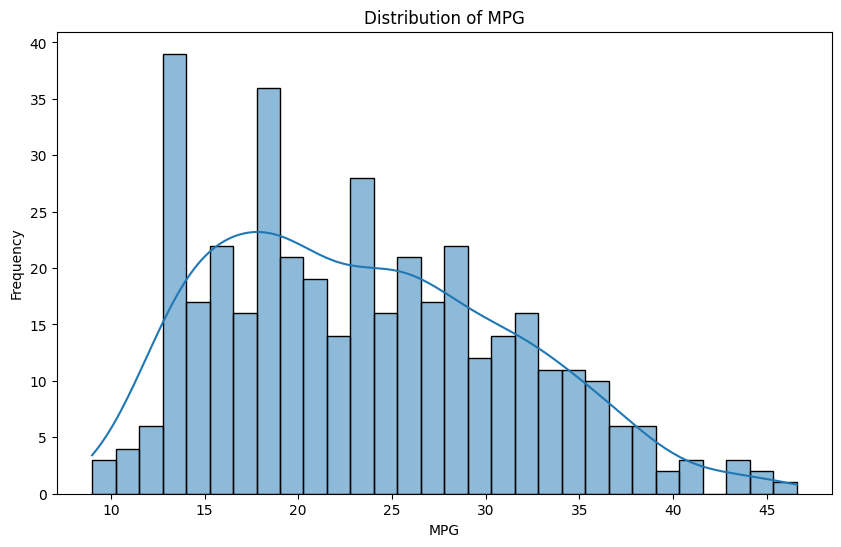

In [26]:
#  Plot the distribution of 'mpg' values
mpg_values = spark.sql("SELECT mpg FROM auto_mpg").toPandas()
plt.figure(figsize=(10, 6))
sns.histplot(mpg_values['mpg'], bins=30, kde=True)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.show()

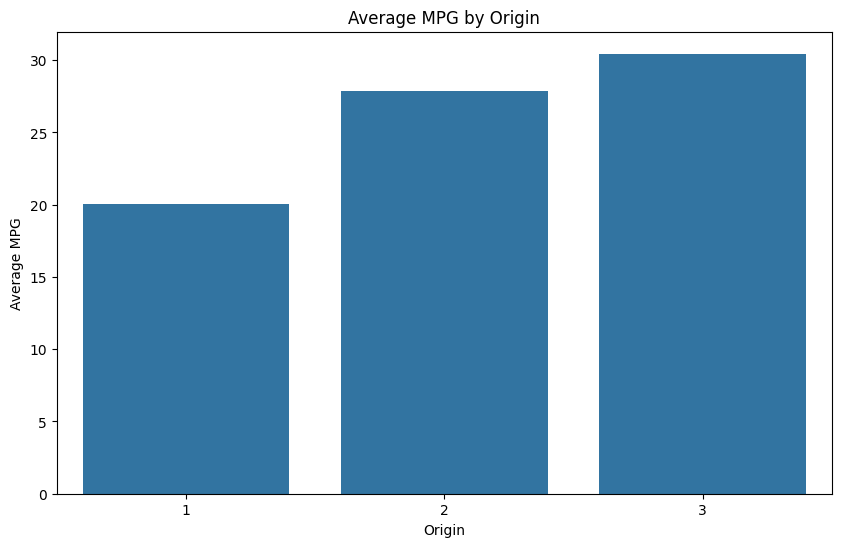

In [27]:
#  Plot the average mpg for each origin
avg_mpg_by_origin = spark.sql("SELECT origin, AVG(mpg) as avg_mpg FROM auto_mpg GROUP BY origin").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_mpg_by_origin, x='origin', y='avg_mpg')
plt.title('Average MPG by Origin')
plt.xlabel('Origin')
plt.ylabel('Average MPG')
plt.show()

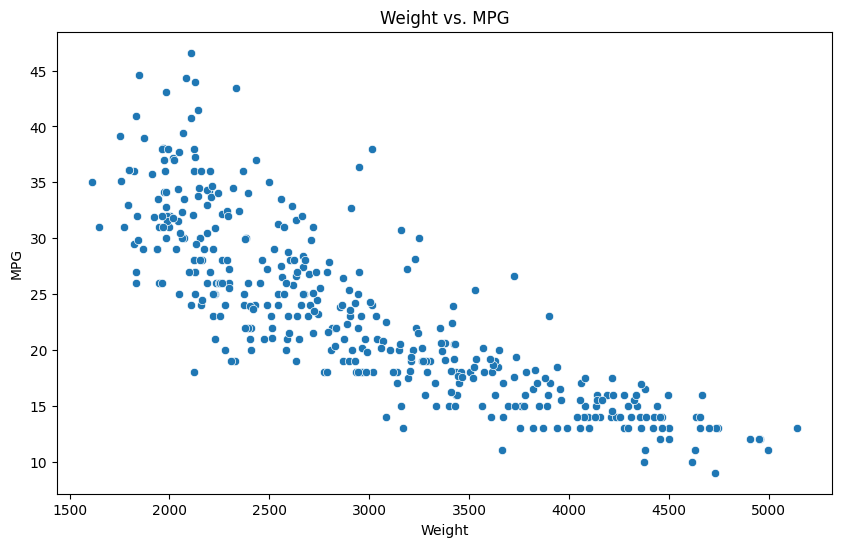

In [28]:
#  Scatter plot of weight vs. mpg
weight_mpg = spark.sql("SELECT weight, mpg FROM auto_mpg").toPandas()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weight_mpg, x='weight', y='mpg')
plt.title('Weight vs. MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

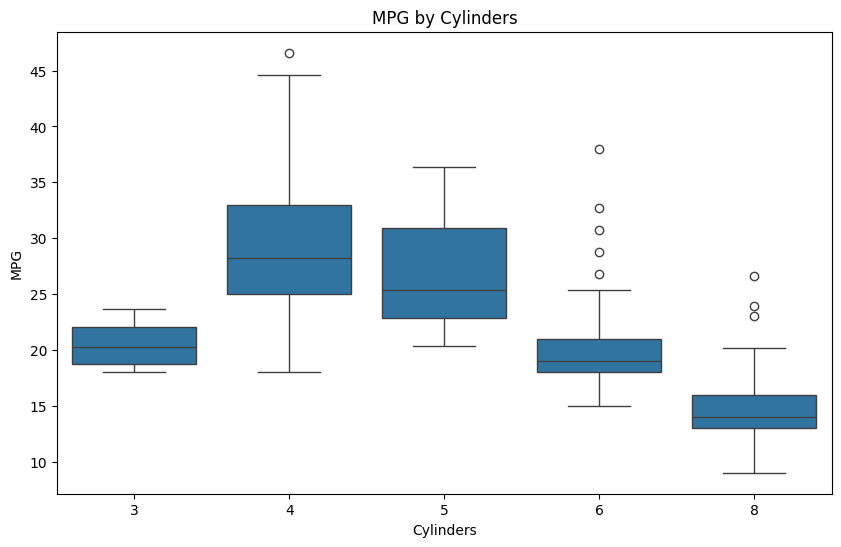

In [29]:
#  Box plot of mpg by cylinders
mpg_by_cylinders = spark.sql("SELECT cylinders, mpg FROM auto_mpg").toPandas()
plt.figure(figsize=(10, 6))
sns.boxplot(data=mpg_by_cylinders, x='cylinders', y='mpg')
plt.title('MPG by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()

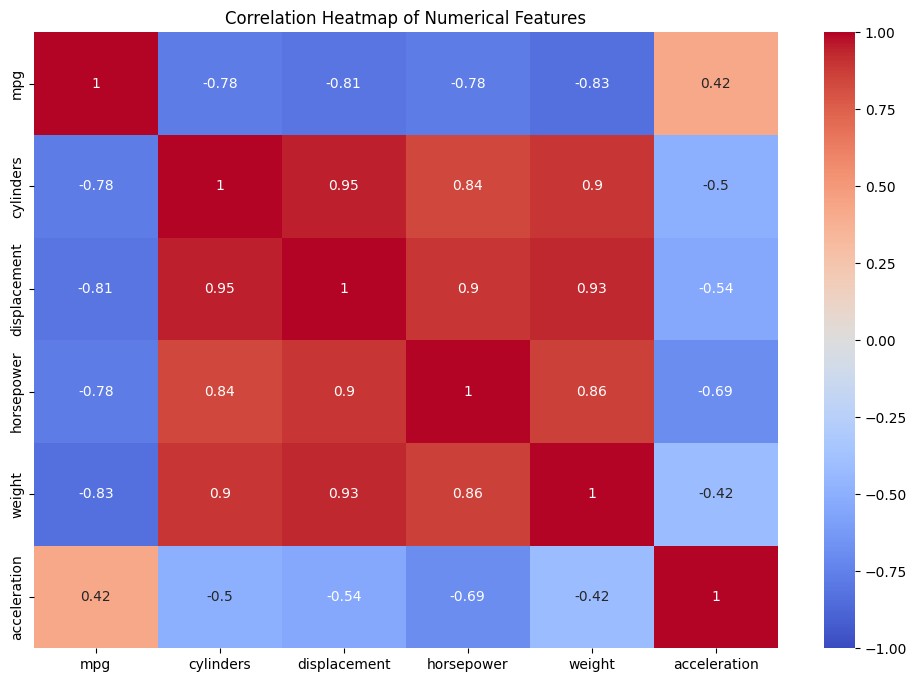

In [30]:
#  Plot the correlation heatmap of numerical features with data cleaning
numerical_features = spark.sql("""
    SELECT
        CAST(mpg AS FLOAT) AS mpg,
        CAST(cylinders AS FLOAT) AS cylinders,
        CAST(displacement AS FLOAT) AS displacement,
        CAST(CASE WHEN horsepower = '?' THEN NULL ELSE horsepower END AS FLOAT) AS horsepower,
        CAST(weight AS FLOAT) AS weight,
        CAST(acceleration AS FLOAT) AS acceleration
    FROM auto_mpg
""").toPandas()
numerical_features = numerical_features.dropna()
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<Figure size 1200x800 with 0 Axes>

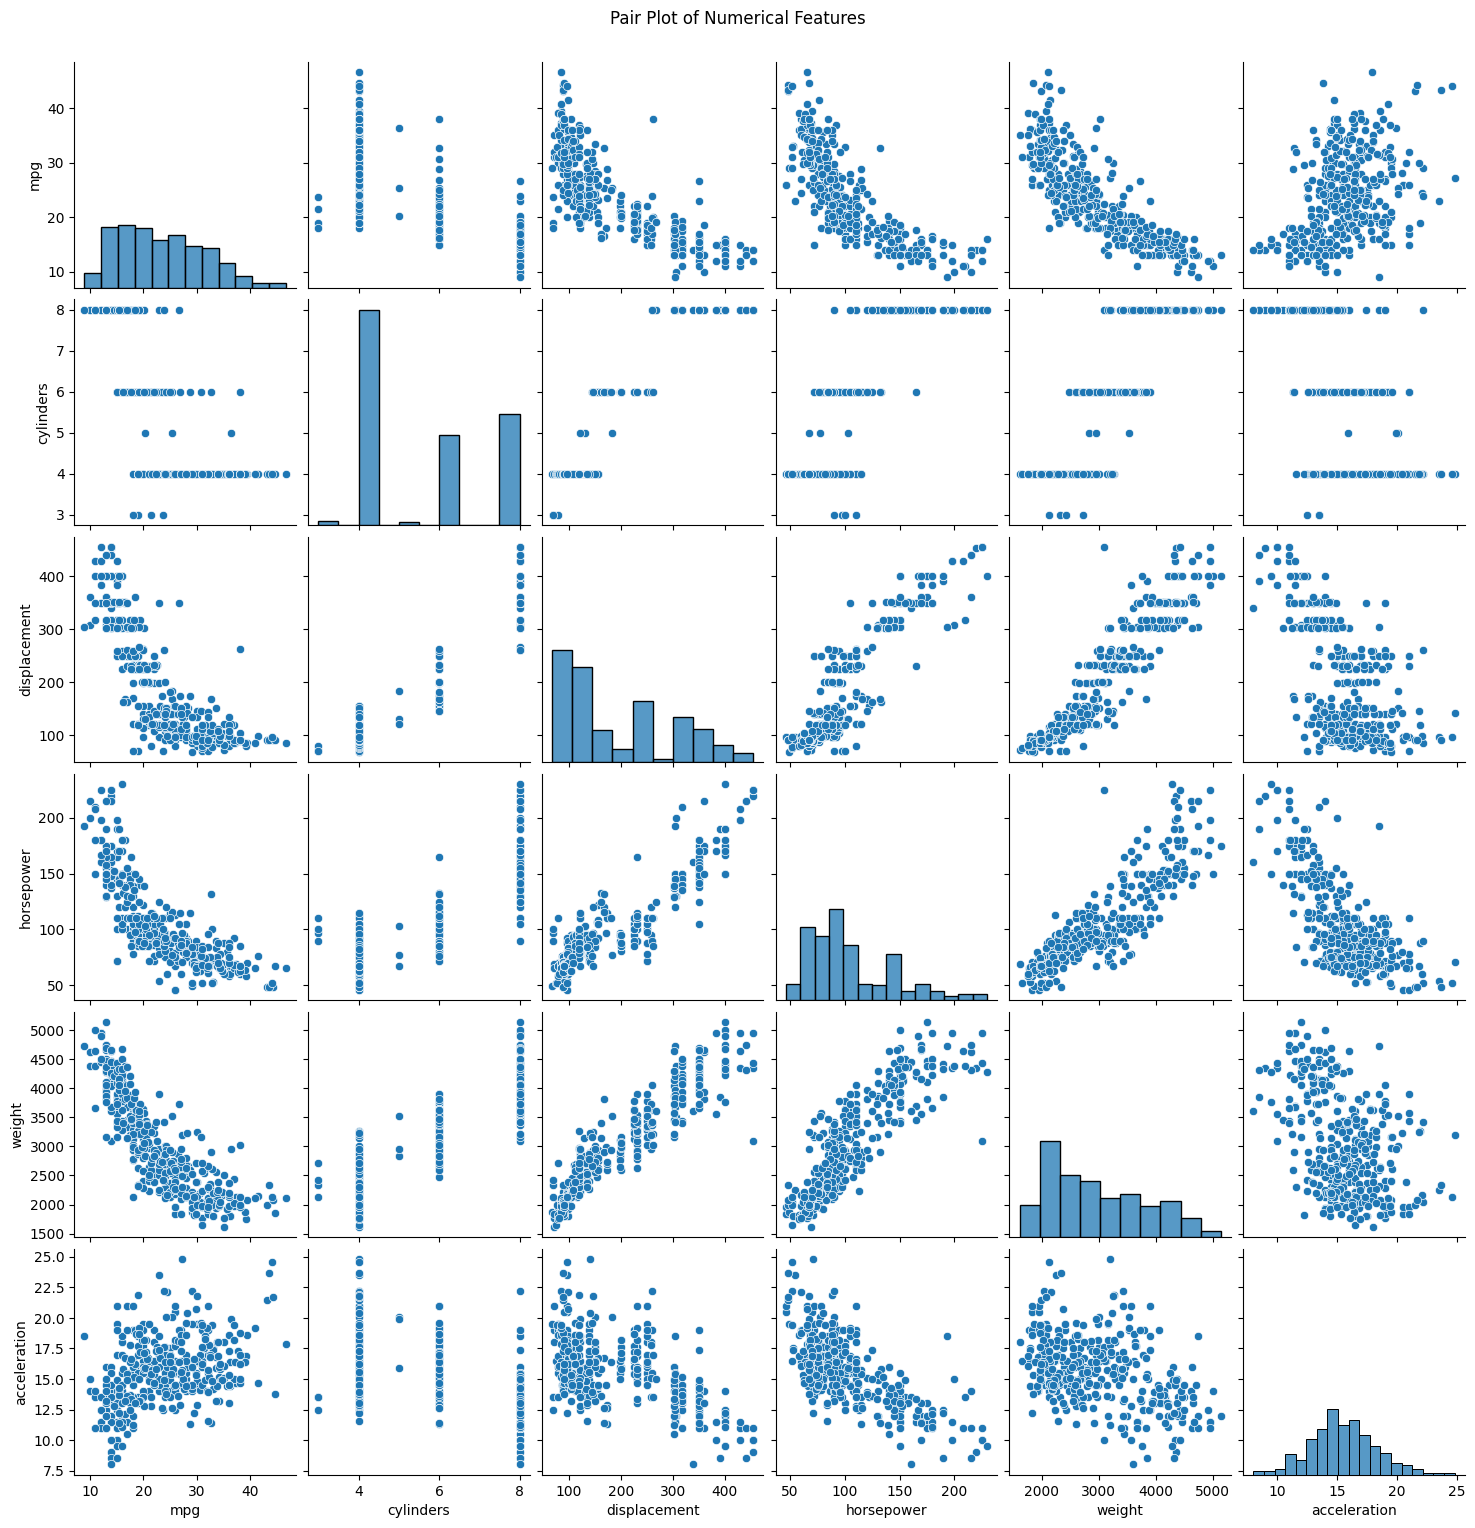

In [31]:
#  Pair plot of numerical features
plt.figure(figsize=(12, 8))
sns.pairplot(numerical_features)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

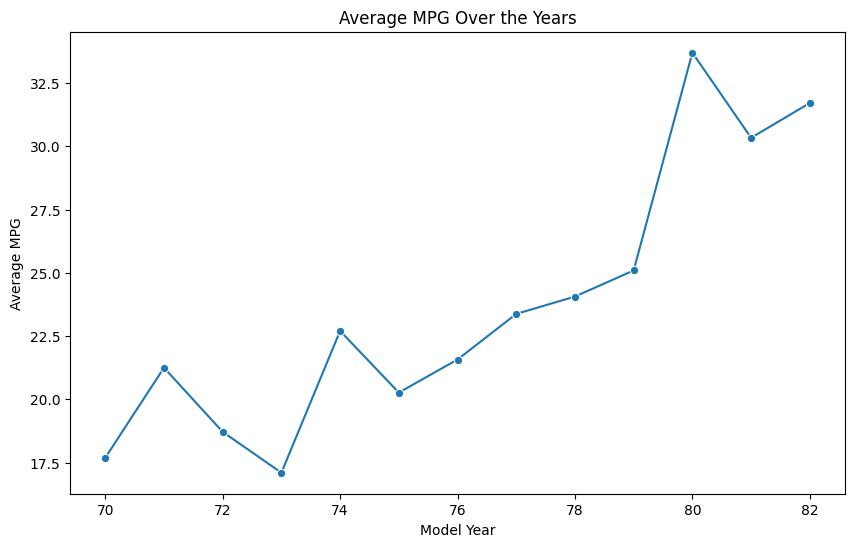

In [32]:
#  Line plot of average mpg over the years
avg_mpg_by_year = spark.sql("SELECT `model year`, AVG(mpg) as avg_mpg FROM auto_mpg GROUP BY `model year` ORDER BY `model year`").toPandas()
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg_by_year, x='model year', y='avg_mpg', marker='o')
plt.title('Average MPG Over the Years')
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.show()

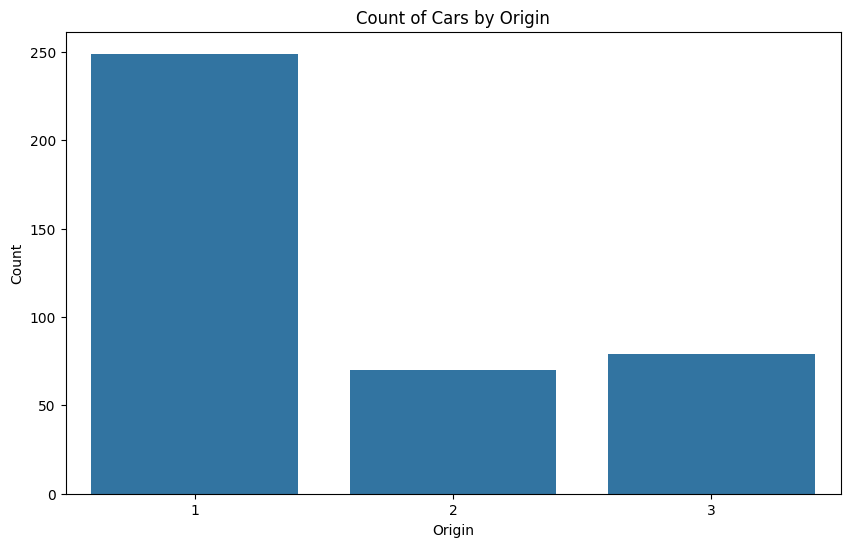

In [33]:
#  Bar plot of count of cars by origin
count_by_origin = spark.sql("SELECT origin, COUNT(*) as count FROM auto_mpg GROUP BY origin").toPandas()
plt.figure(figsize=(10, 6))
sns.barplot(data=count_by_origin, x='origin', y='count')
plt.title('Count of Cars by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()